In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#from google.colab import drive
#drive.mount("/content/drive")
data = pd.read_csv("C:/Users/ASUS/Desktop/IntoMachineLearning/ml/data.csv")

In [2]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#Benign and malignant tumor need to be seperated for visualization
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

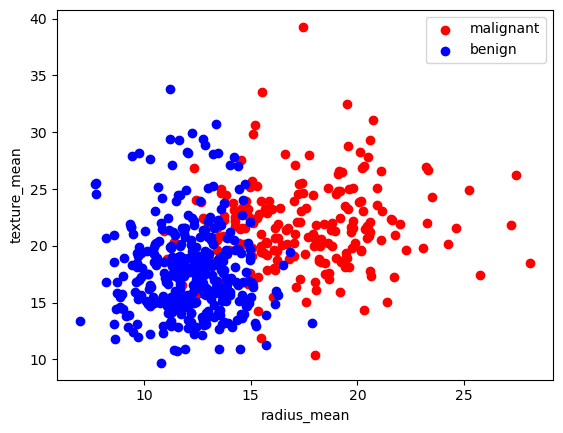

In [4]:
plt.scatter(M.radius_mean, M.texture_mean, color="red", label="malignant")
plt.scatter(B.radius_mean, B.texture_mean, color="blue", label="benign")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend() #Grafik elemanları adlandırdığımız etiketleri grafikte gösterir.
plt.show()

In [5]:
#split the data for features and labels
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis]

y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)

In [6]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
# normalization
x = (x_data - x_data.min())/(x_data.max() - x_data.min())

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [21]:
print(x_train)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
249  0.000961     0.214823      0.176530        0.207864   0.111474   
58   0.000932     0.287236      0.324653        0.268261   0.162757   
476  0.000991     0.341663      0.365911        0.335982   0.201442   
529  0.000998     0.240854      0.126141        0.235229   0.127975   
422  0.000985     0.219083      0.213392        0.218851   0.112280   
..        ...          ...           ...             ...        ...   
129  0.000942     0.606228      0.521136        0.598507   0.444751   
144  0.000944     0.178380      0.177883        0.169097   0.089841   
72   0.000934     0.483648      0.500845        0.486559   0.333362   
235  0.096828     0.333617      0.390260        0.317877   0.195080   
37   0.000929     0.286289      0.294555        0.268261   0.161315   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
249         0.439379          0.180050        0.101406             0

In [27]:
del x_train['Unnamed: 32' ]

In [28]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0
 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0]


In [29]:
print(x_train)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
249  0.000961     0.214823      0.176530        0.207864   0.111474   
58   0.000932     0.287236      0.324653        0.268261   0.162757   
476  0.000991     0.341663      0.365911        0.335982   0.201442   
529  0.000998     0.240854      0.126141        0.235229   0.127975   
422  0.000985     0.219083      0.213392        0.218851   0.112280   
..        ...          ...           ...             ...        ...   
129  0.000942     0.606228      0.521136        0.598507   0.444751   
144  0.000944     0.178380      0.177883        0.169097   0.089841   
72   0.000934     0.483648      0.500845        0.486559   0.333362   
235  0.096828     0.333617      0.390260        0.317877   0.195080   
37   0.000929     0.286289      0.294555        0.268261   0.161315   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
249         0.439379          0.180050        0.101406             0

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
del x_test['Unnamed: 32' ]

In [33]:
prediction = knn.predict(x_test)
prediction

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [34]:
print("k: {}, score: {}".format(3, knn.score(x_test, y_test)))

k: 3, score: 0.9532163742690059


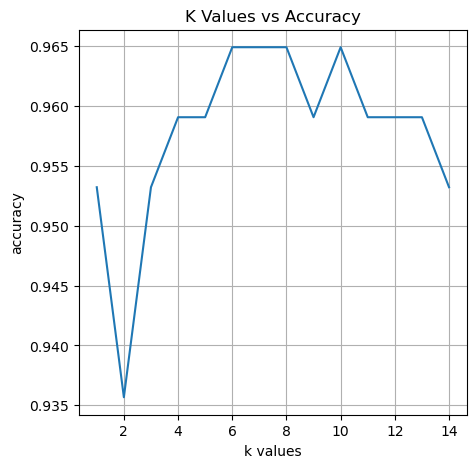

Best accuracy is 0.9649122807017544 with K = 6


In [35]:
test_accuracy = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    test_accuracy.append(knn2.score(x_test, y_test))
    
plt.figure(figsize = (5,5))
plt.plot(range(1,15), test_accuracy)
plt.title('K Values vs Accuracy')
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))

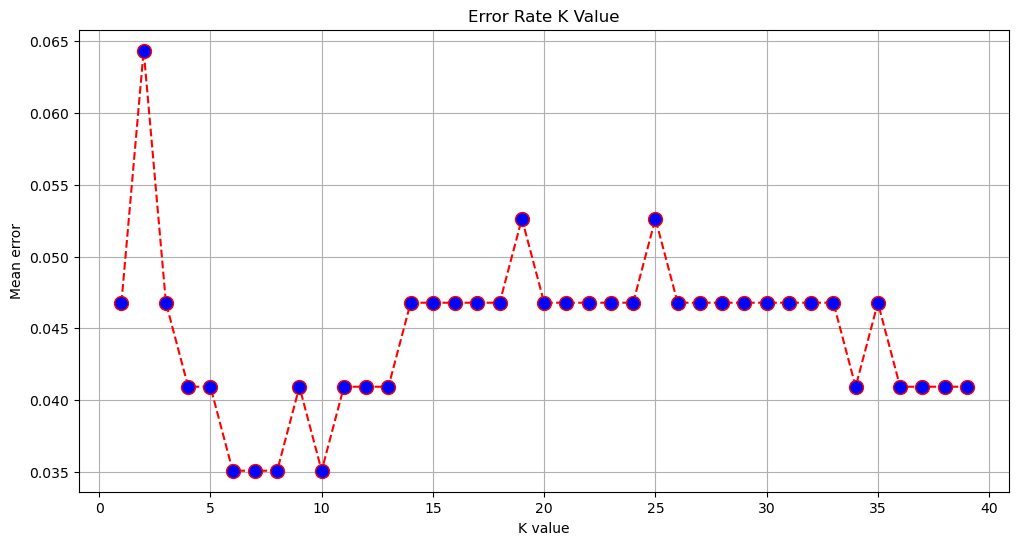

In [36]:
error = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10)
plt.title("Error Rate K Value")
plt.xlabel("K value")
plt.ylabel("Mean error")
plt.grid()
plt.show()